In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import random
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import pipeline



ch = pd.read_csv("GPR_ele_drone.txt", delim_whitespace=True,
          header=None, names=["Elev","Index"])
tr = pd.read_csv("trace.txt", delim_whitespace=True,
          header=None, names=["GPR_points"])


N = 110
max = 0

size = np.zeros(shape=(N), dtype=int)
size2 = np.zeros(shape=(N), dtype=int)

for i in np.arange(1,N+1,1):
    tm = ch.loc[ch["Index"]==i,["Elev"]]
    size[i-1] = np.size(tm)
   
max = np.max(size)
    
print("max number of GNSS points",max)

for i in np.arange(1,N+1,1):
    size2[i-1] = tr["GPR_points"][i-1]
#    print(size2[i-1])
min = np.min(size2)
print("min number of GPR points",min)

#The shape of final output
Elev_ch4 = np.zeros(shape=(N,min))
Elev_ch5 = np.zeros(shape=(N,min))


max number of GNSS points 1525
min number of GPR points 1498


In [172]:
GNSS_drone = np.zeros(shape=(N,max))
GNSS_corr = np.zeros(shape=(N,max))
#GNSS_corr2 = np.zeros(shape=(N,max))

for n in np.arange(0,N,1):

    print("++++++")
    print("n=",n)
    print("++++++")
    tm = ch.loc[ch["Index"]==n,["Elev"]]
    
    tm_size = np.size(tm)

    for j in np.arange(0,tm_size,1):
        GNSS_drone[n][j] = tm["Elev"][j+sum(size[:(n)])]
    


++++++
n= 0
++++++
++++++
n= 1
++++++
++++++
n= 2
++++++
++++++
n= 3
++++++
++++++
n= 4
++++++
++++++
n= 5
++++++
++++++
n= 6
++++++
++++++
n= 7
++++++
++++++
n= 8
++++++
++++++
n= 9
++++++
++++++
n= 10
++++++
++++++
n= 11
++++++
++++++
n= 12
++++++
++++++
n= 13
++++++
++++++
n= 14
++++++
++++++
n= 15
++++++
++++++
n= 16
++++++
++++++
n= 17
++++++
++++++
n= 18
++++++
++++++
n= 19
++++++
++++++
n= 20
++++++
++++++
n= 21
++++++
++++++
n= 22
++++++
++++++
n= 23
++++++
++++++
n= 24
++++++
++++++
n= 25
++++++
++++++
n= 26
++++++
++++++
n= 27
++++++
++++++
n= 28
++++++
++++++
n= 29
++++++
++++++
n= 30
++++++
++++++
n= 31
++++++
++++++
n= 32
++++++
++++++
n= 33
++++++
++++++
n= 34
++++++
++++++
n= 35
++++++
++++++
n= 36
++++++
++++++
n= 37
++++++
++++++
n= 38
++++++
++++++
n= 39
++++++
++++++
n= 40
++++++
++++++
n= 41
++++++
++++++
n= 42
++++++
++++++
n= 43
++++++
++++++
n= 44
++++++
++++++
n= 45
++++++
++++++
n= 46
++++++
++++++
n= 47
++++++
++++++
n= 48
++++++
++++++
n= 49
++++++
++++++
n= 

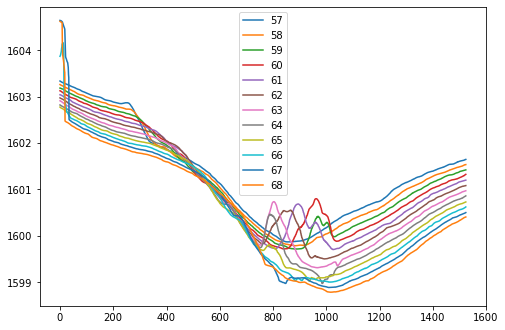

In [147]:
#trech piles
s = 57
e = 69

#van position
#s = 66
#s = 68
for t in np.arange(s,e,1):
    plt.plot(GNSS_drone[t][:])
plt.legend(np.arange(s,e,1))

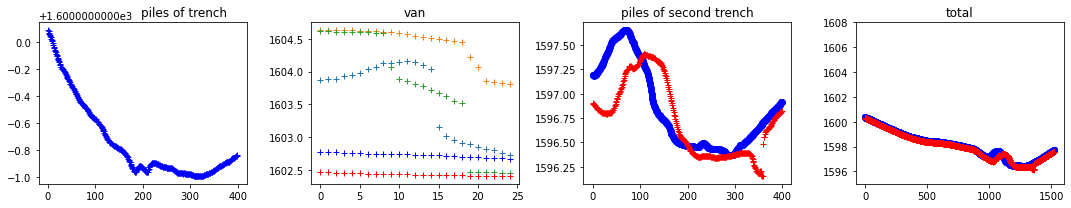

In [194]:
plt.rcParams["figure.figsize"] = (15,3)

plt.subplot(1,4,1)
plt.plot(GNSS_drone[66][700:1100],"b+")
#plt.title("piles of trench", position=(-1,-0.5))
plt.title("piles of trench", position=(0.7,0))

plt.subplot(1,4,2)
plt.plot(GNSS_drone[65][0:25],"b+")
plt.plot(GNSS_drone[66][0:25],"+")
plt.plot(GNSS_drone[67][0:25],"+")
plt.plot(GNSS_drone[68][0:25],"+")
plt.plot(GNSS_drone[69][0:25],"r+")

plt.title("van", position=(0.5,3))

plt.subplot(1,4,3)
plt.plot(GNSS_drone[100][1000:1400],"bo")
plt.plot(GNSS_drone[101][1000:1400],"r+")
plt.title("piles of second trench")


plt.subplot(1,4,4)
plt.plot(GNSS_drone[100][:],"bo")
plt.plot(GNSS_drone[101][:],"r+")
plt.title("total")

plt.ylim(1595,1608)

plt.tight_layout()

#print(GNSS_drone[69][0:25])

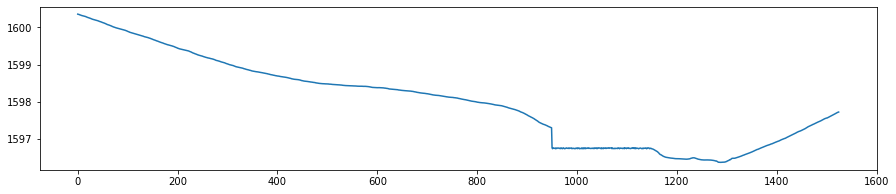

In [231]:
for i in np.arange(0,N,1):
    for t in np.arange(0,max,1):
        GNSS_corr[i][t] = GNSS_drone[i][t]

s = 57
e = 107

for i in np.arange(s,e+1,1):
##############################################################        
#CORRECT THE PILES OF TRENCH        
#Which line do you wanna change?     
    if(i >= 57 and i <= 69):       
        s_l = 57
        e_l = 69  
#making randome varialbes in the position that you want to change
        st = 850
        et = 1050
        k = 0.0

        for t in np.arange(st,et,1):
            k = k + 10**(-2.7)
            GNSS_corr[i][t] = np.random.uniform(np.min(GNSS_corr[i][:]),np.min(GNSS_corr[i][:])+k )

        
##############################################################      
#CORRECT THE POSITION OF VAN
#Which line do you wanna change?
    if(i >= 66 and i <= 68):
        s_l = 66
        e_l = 68       
#making randome varialbes in the position that you want to change
        st = 0
        et = 40
        k = 0.0
        
        for t in np.arange(st,et,1):
                #k = k + 10**(-2.7)
            GNSS_corr[i][t] = np.random.uniform(GNSS_corr[i][et],GNSS_corr[i][et]+0.01 )  



##############################################################                
#CORRECT TTHE PILES OF SECOND TRENCH        
#Which line do you wanna change?
#    if(i >= 95 and i <= 107):
#        s_l = 95
#        e_l = 107       
#making randome varialbes in the position that you want to change
    if(i==100):
        st = 950
        et = 1150
        k = 0.0
        for t in np.arange(st,et,1):
                #k = k + 10**(-2.7)
                #GNSS_corr[i][t] = np.random.uniform(np.min(GNSS_corr[i][:]),np.min(GNSS_corr[i][:])-k )               
            GNSS_corr[i][t] = np.random.uniform(GNSS_corr[i][st],GNSS_corr[i][et]) 
                
                
##############################################################       
    x = np.zeros(shape=(max))

    for t in np.arange(0,max,1):
        x[t] = t * 1
#    x[t] = t * 0.05

#Transpose x 
    x2 = x[:,None]
#print(x[:,None])

    y = np.c_[GNSS_corr[i][:]]
    #print(y)


#regression
    poly = preprocessing.PolynomialFeatures(degree=35,include_bias=False)
    scaler = preprocessing.StandardScaler()
    lin_reg2 = linear_model.LinearRegression()

    pipeline_reg = pipeline.Pipeline([('poly',poly), ('scal',scaler),('lin', lin_reg2)])
    pipeline_reg.fit(x2,y)

    GPR_x = range(0,max,1)
    GPR_x2 = np.array(GPR_x)
    GPR_x3=np.c_[GPR_x2]

    #print(GPR_x3)

    curve = pipeline_reg.predict(GPR_x3)
    
    if(i == 100):
        plt.plot(GNSS_corr[i])
        
#transfering data    
    for t in np.arange(0,max,1):
        GNSS_corr[i][t] = curve[t]


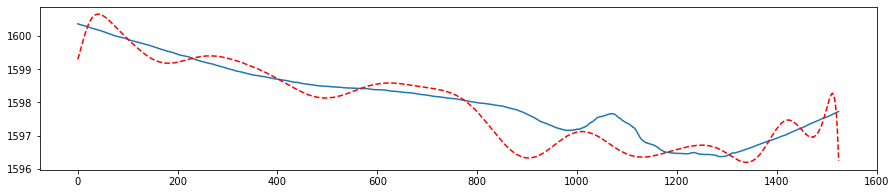

In [214]:
#plt.plot(curve[1200:1497],"r--")
#plt.plot(GNSS_drone[58][1200:1497])
#plt.plot(curve,"r--")

plt.plot(GNSS_drone[100][:])
plt.plot(GNSS_corr[100][:],"r--")

In [ ]:
#plt.plot(GNSS_drone[59][700:1100])
#plt.plot(GNSS_drone[59][:])

#st = 850
#et = 1050
#for t in np.arange(st,et,1):
#    GNSS_drone[59][t] = 0.0
    
#plt.plot(GNSS_drone[59][700:1100],"ro")
#plt.plot(GNSS_drone[59][:],"ro")

#plt.ylim(1595,1610)

In [135]:
f1=open("corr_3Dmorph_GPR_drone.txt",'a')
np.savetxt(f1,GNSS_corr.T,"%9.3f", newline="\n")
#np.savetxt(f1,GNSS_drone,"%9.3f", newline="\n")

#SN = "_1" # section number
#f2=open("3Dmorph_section_GPR_drone"+SN+".txt",'a')
#for n in np.arange(0,3,1):
#    np.savetxt(f2,GNSS_drone[n][:],"%9.3f", newline="\n")         
